In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

df = pd.read_csv("/kaggle/input/ab-nyc-2019/AB_NYC_2019.csv")

df.columns = df.columns.str.lower()
df.head()
# df.dtypes == "object"

for col in df.columns:
    print()
    print("Column:", col)
    print("Unique values (top5):",df[col].unique()[:5])
    print("Unique count for ",col, "is", df[col].nunique())

/kaggle/input/ab-nyc-2019/AB_NYC_2019.csv

Column: id
Unique values (top5): [2539 2595 3647 3831 5022]
Unique count for  id is 48895

Column: name
Unique values (top5): ['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' 'Cozy Entire Floor of Brownstone'
 'Entire Apt: Spacious Studio/Loft by central park']
Unique count for  name is 47905

Column: host_id
Unique values (top5): [2787 2845 4632 4869 7192]
Unique count for  host_id is 37457

Column: host_name
Unique values (top5): ['John' 'Jennifer' 'Elisabeth' 'LisaRoxanne' 'Laura']
Unique count for  host_name is 11452

Column: neighbourhood_group
Unique values (top5): ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Unique count for  neighbourhood_group is 5

Column: neighbourhood
Unique values (top5): ['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem']
Unique count for  neighbourhood is 221

Column: latitude
Unique values (top5): [40.64749 40.75362 40.80902 40.68514 40

<AxesSubplot:xlabel='price', ylabel='Count'>

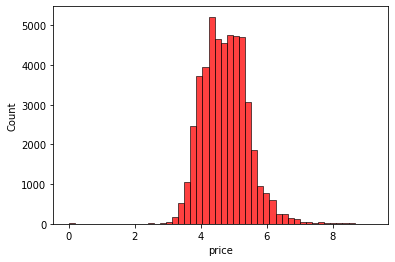

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


np.log1p([0, 1,10,100,1000])
priceLogs = np.log1p(df.price)
df.price + priceLogs
sns.histplot(priceLogs, bins=50, color='red')

In [3]:
# import pandas_profiling
# pandas_profiling.ProfileReport(df)

In [4]:


print(1)
ourDf = df[['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
# ourDf = df[['price','minimum_nights','calculated_host_listings_count']]
print("missing values: ", ourDf.isnull().sum().sum())

print(2)
print("minimum_nights mean:", ourDf.minimum_nights.mean())
ourDf.dtypes


1
missing values:  10052
2
minimum_nights mean: 7.029962163820431


latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
print("Part3 Setting Up The Validation Framework")
n = len(df)
print("Total lines:",n)

# prepare records count
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = (n - n_val - n_test)

# repare random indexes
indexes = np.arange(n)
np.random.seed(42)
np.random.shuffle(indexes)

# split data into 60% train, 20% validation and 20% test
df_train = ourDf.iloc[indexes[:n_train]]
df_val = ourDf.iloc[indexes[n_train:n_train+n_val]]
df_test = ourDf.iloc[indexes[n_train+n_val:]]

print("Total reccords after train/val/test random repartition:",len(df_val)+ len(df_test)+ len(df_train))

# prepare training/val/test data Y
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)
print("Total reccords after train/val/test random repartition:",len(y_train)+ len(y_val)+ len(y_test))

# delete price from source data to not use in training, we will use the log values as output.
del df_train["price"]
del df_val["price"]
del df_test["price"]




Part3 Setting Up The Validation Framework
Total lines: 48895
Total reccords after train/val/test random repartition: 48895
Total reccords after train/val/test random repartition: 48895


In [6]:
df_train.iloc[10]
np.expm1(1)
np.expm1(np.log1p(123))
# np.exp(np.log(123))

123.00000000000003

In [7]:
# get prediction:
def linear_regresion(xi, w):
    xi = [1] + xi
    n = len(xi)
    
    res = 0.0
    for j in range(0,n):
        res = res + xi[j]*w[j]
        
    return res

def linear_regresion2(xi, w):
    xi = [1]+xi
    return np.array(xi).dot(w)

linear_regresion([14,23,31], [0.7, 0.1, 0.2, 0.3]) # = 16
# OR: 
linear_regresion2([14,23,31], [0.7, 0.1, 0.2, 0.3]) # = 16
# OR
# w0 + X.dot(w)  #where X = API input matrix, W = [w1, w2,...]


16.0

In [8]:
# train model to get W example

trainInput = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9],
    [10,11,12],
    [13,14,15],
    [0,1,2],
])

trainOutput =  [10,40,70,100,130,0]

def train_linear_regresion(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.pinv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full

w = train_linear_regresion(trainInput, trainOutput)
linear_regresion([1111,1112,1113], w)

11110.000000000038

<AxesSubplot:ylabel='Count'>

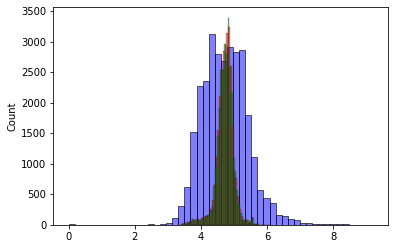

In [9]:
# train model to get W on real data

# df_train
# df_val
# df_test

# y_train
# y_val
# y_test

# train by filling NA with 0
X_train0 = df_train.fillna(0).values
w_train0 = train_linear_regresion(X_train0, y_train)  #train
y_train0Predicted = w_train0[0] + X_train0.dot(w_train0[1:])

# train by filling NA with mean of the column
X_trainMean = df_train.fillna(df_train.mean()).values
w_trainMean = train_linear_regresion(X_trainMean, y_train)  #train
y_trainMeanPredicted = w_trainMean[0] + X_trainMean.dot(w_trainMean[1:])



sns.histplot(y_train, bins=50, color='blue', alpha=0.5)      #Y true values
sns.histplot(y_train0Predicted, bins=50, color='red', alpha=0.5)       # predcred Y with fillna 0
sns.histplot(y_trainMeanPredicted, bins=50, color='green', alpha=0.5)  # predcred Y with fillna mean

# sns.histplot(df_train[df_train.reviews_per_month<3].reviews_per_month, bins=50, color='green', alpha=0.5)




In [10]:
# RMSE

def rmse(y, y_pred):
    error = y-y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

print("RMSE on train data with 0 null values:", rmse(y_train, y_train0Predicted))
print("RMSE on train data with mean null values:", rmse(y_train, y_trainMeanPredicted))


RMSE on train data with 0 null values: 0.6428860484860425
RMSE on train data with mean null values: 0.6429347474014221


RMSE on validation data with 0 null values: 0.64
RMSE on validation data with mean null values: 0.64


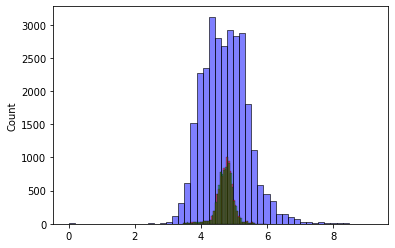

In [11]:
# Q3: Validating the model

# validation by filling NA with 0
X_val0 = df_val.fillna(0).values
w_val0 = train_linear_regresion(X_val0, y_val)  #train
y_val0Predicted = w_val0[0] + X_val0.dot(w_val0[1:])

# validation by filling NA with mean of the column
X_valMean = df_val.fillna(df_val.mean()).values
w_valMean = train_linear_regresion(X_valMean, y_val)   #train
y_valMeanPredicted = w_valMean[0] + X_valMean.dot(w_valMean[1:])

sns.histplot(y_train, bins=50, color='blue', alpha=0.5)      #Y true values
sns.histplot(y_val0Predicted, bins=50, color='red', alpha=0.5)       # predcred Y with fillna 0
sns.histplot(y_valMeanPredicted, bins=50, color='green', alpha=0.5)  # predcred Y with fillna mean

print("RMSE on validation data with 0 null values:", round(rmse(y_val, y_val0Predicted),2))
print("RMSE on validation data with mean null values:", round(rmse(y_val, y_valMeanPredicted),2))



In [12]:
# Q4: REGULARIZATION
def train_linear_regresion_regularized(X, y, r=0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + (r * np.eye(XTX.shape[0]))
    XTX_inv = np.linalg.pinv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full

def train(df, y, fillnaVal=0, r=0.01):
    X = df.fillna(fillnaVal).values
    wReg = train_linear_regresion_regularized(X, y, r)  #train
    yRegPredicted = wReg[0] + X.dot(wReg[1:])
    return yRegPredicted

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
#     y_train0RegPredicted = train(df_train, y_train, 0, r)
#     print("RMSE on trained data with 0 null values:", round(rmse(y_train, y_train0RegPredicted),2))
    y_val0RegPredicted = train(df_val, y_val, 0, r)
    print("RMSE on validation data (fillna = 0, r =",r,"):", round(rmse(y_val, y_val0RegPredicted),2))




RMSE on validation data (fillna = 0, r = 0 ): 0.64
RMSE on validation data (fillna = 0, r = 1e-06 ): 0.64
RMSE on validation data (fillna = 0, r = 0.0001 ): 0.64
RMSE on validation data (fillna = 0, r = 0.001 ): 0.65
RMSE on validation data (fillna = 0, r = 0.01 ): 0.67
RMSE on validation data (fillna = 0, r = 0.1 ): 0.68
RMSE on validation data (fillna = 0, r = 1 ): 0.68
RMSE on validation data (fillna = 0, r = 5 ): 0.68
RMSE on validation data (fillna = 0, r = 10 ): 0.68


In [13]:
# Q5

def prepare_data(df, seed=42):
    n = len(df)

    # prepare records count
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = (n - n_val - n_test)

    # repare random indexes
    indexes = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(indexes)

    # split data into 60% train, 20% validation and 20% test
    df_train = ourDf.iloc[indexes[:n_train]]
    df_val = ourDf.iloc[indexes[n_train:n_train+n_val]]
    df_test = ourDf.iloc[indexes[n_train+n_val:]]

#     print("Total reccords after train/val/test random repartition:",len(df_val)+ len(df_test)+ len(df_train))

    # prepare training/val/test data Y
    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)
#     print("Total reccords after train/val/test random repartition:",len(y_train)+ len(y_val)+ len(y_test))

    # delete price from source data to not use in training, we will use the log values as output.
    del df_train["price"]
    del df_val["price"]
    del df_test["price"]
    return df_train, df_val, df_test, y_train, y_val, y_test

rmseList = []    
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:    
    df_train, df_val, df_test, y_train, y_val, y_test = prepare_data(df, s)

    # train by filling NA with 0
    X_train0 = df_train.fillna(0).values
    w_train0 = train_linear_regresion(X_train0, y_train)  #train
    y_train0Predicted = w_train0[0] + X_train0.dot(w_train0[1:])


    # validation by filling NA with 0
    X_val0 = df_val.fillna(0).values
    w_val0 = train_linear_regresion(X_val0, y_val)  #train
    y_val0Predicted = w_val0[0] + X_val0.dot(w_val0[1:])
    
    rmseVal = round(rmse(y_val, y_val0Predicted),2)
    print("RMSE on train data with 0 null values(seed=",s,"):", rmseVal)
#     print("RMSE on validation data with 0 null values(seed=",s,"):", round(rmse(y_val, y_val0Predicted),2))
    rmseList.append(rmseVal)

    std = np.std(rmseList)
    
print("SRD of RMSE on validation data with different seeds: ",round(std, 3))


RMSE on train data with 0 null values(seed= 0 ): 0.65
RMSE on train data with 0 null values(seed= 1 ): 0.65
RMSE on train data with 0 null values(seed= 2 ): 0.65
RMSE on train data with 0 null values(seed= 3 ): 0.64
RMSE on train data with 0 null values(seed= 4 ): 0.64
RMSE on train data with 0 null values(seed= 5 ): 0.63
RMSE on train data with 0 null values(seed= 6 ): 0.63
RMSE on train data with 0 null values(seed= 7 ): 0.65
RMSE on train data with 0 null values(seed= 8 ): 0.65
RMSE on train data with 0 null values(seed= 9 ): 0.64
SRD of RMSE on validation data with different seeds:  0.008


In [14]:
# Q6

df_train6, df_val6, df_test6, y_train6, y_val6, y_test6 = prepare_data(df, 9)
df_train_val = pd.concat([df_train6, df_val6])
y_train_val = np.concatenate([y_train6, y_val6])

print(df_train_val.shape, y_train_val.shape)

r=0.001

y_train_val0RegPredicted = train(df_train_val, y_train_val, 0, r)    

print("RMSE on train + validation data (fillna = 0, r =",r,"):", round(rmse(y_train_val, y_train_val0RegPredicted),2))


(39116, 7) (39116,)
RMSE on train + validation data (fillna = 0, r = 0.001 ): 0.65


In [15]:
# FINAL PREDICTION
X = df_train_val.fillna(0).values
W = train_linear_regresion_regularized(X, y_train_val, 0.001)  #train

test_indexes = indexes[n_train+n_val:]
testRecord = ourDf.iloc[test_indexes[1]]
print("Test record:\n",testRecord)
df_test1 = pd.DataFrame([testRecord])
del df_test1["price"]

price1Predicted = W[0] + df_test1.values.dot(W[1:])[0]
print("Predicted price (log) is: ", price1Predicted)

finalPrice1Predicted = np.expm1(price1Predicted)
print("Predicted price is: ", finalPrice1Predicted)
print("Actual price:",testRecord.price)



Test record:
 latitude                           40.68554
longitude                         -73.96651
price                             120.00000
minimum_nights                      3.00000
number_of_reviews                   3.00000
reviews_per_month                   0.47000
calculated_host_listings_count      1.00000
availability_365                    0.00000
Name: 39219, dtype: float64
Predicted price (log) is:  4.691560940071497
Predicted price is:  108.02322577894583
Actual price: 120.0
